In [1]:
from PIL import Image
import numpy as np
import scipy.misc as misc
import pandas as pd
import re
import scipy
import matplotlib.pyplot as plt

print(scipy.__version__)

0.19.1


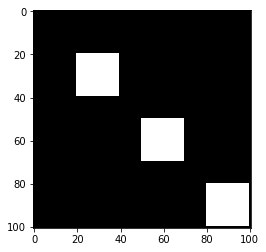

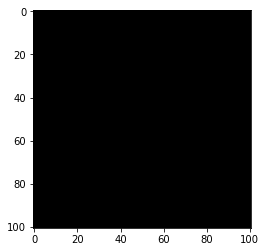

In [2]:

def zone(image, x_start, y_start, x_size=20, y_size=20):
    w=101
    h=101
    zero_image = [[0 for x in range(w)] for y in range(h)]
    for ys in range(y_start, y_start+y_size):
        for xs in range(x_start, x_start+x_size):
            zero_image[ys][xs] = image[ys][xs]
    x_start+=30
    y_start+=30
    for ys in range(y_start, y_start+y_size):
        for xs in range(x_start, x_start+x_size):
            zero_image[ys][xs] = image[ys][xs]
    x_start+=30
    y_start+=30
    for ys in range(y_start, y_start+y_size):
        for xs in range(x_start, x_start+x_size):
            zero_image[ys][xs] = image[ys][xs]
    return zero_image

def zone_three(image, x_start, y_start, x_size=20, y_size=20):
    w=20
    h=20
    zero_image = [[0 for x in range(w)] for y in range(h)]
    for ys in range(y_start, y_start+y_size):
        for xs in range(x_start, x_start+x_size):
            zero_image[ys][xs] = image[ys][xs]
    x_start+=30
    y_start+=30
    for ys in range(y_start, y_start+y_size):
        for xs in range(x_start, x_start+x_size):
            zero_image[ys][xs] = image[ys][xs]
    x_start+=30
    y_start+=30
    for ys in range(y_start, y_start+y_size):
        for xs in range(x_start, x_start+x_size):
            zero_image[ys][xs] = image[ys][xs]
    return zero_image


image = [[1 for x in range(w)] for y in range(h)]
zone_image = zone(image, 20, 20)
zone_image_1 = np.array(zone_image, np.uint8)
plt.imshow(np.uint8(zone_image_1), cmap='gray')
plt.show()



In [ ]:
# filepath ='C:\\Users\\today459\\Google 雲端硬碟\\[深度學習]\\地質抽水資料\\input_gray_1.jpg'
filepath ='H:\\Three_Well_data\\images\\training\\three_well_01_001_train.jpg'
image = misc.imread(filepath, mode = 'P')
image = zone(image, 20, 20)
image = np.array(image, np.uint8)

plt.imshow(np.uint8(image), cmap='gray')
plt.show()


# Three_Well_data for v2
## image
image qcut 100

image (101,101,3)

## annotation
annotation qcut 10

annotation (101,101,1)

In [4]:
def data_to_npy(input_path, output_image_path, output_annotation_path, filenames):
    filenames = ['three_well_01.dat', 'three_well_02.dat', 'three_well_03.dat']
    three_dim_list = []
    for filename in filenames:
        filepath = ( '%s\\%s' % (input_path , filename))

        w, h = 101, 101
        Head_Matrix = [[0 for x in range(w)] for y in range(h)] 
        HC_Matric =  [[0 for x in range(w)] for y in range(h)] 
        column_name = ['x','y','Head', 'Hydraulic Conductivity']
        head_qcut_cnt=100
        hc_qcut_cnt = 10
        header=0
        list_=[]

        with open(filepath, 'r') as f:
            for line in f:
                if header < 3:
                    header = header+1
                    continue
                row = [float(x) for x in re.split(r'\s{2,}', line.strip())]
                list_.append(row)
        df = pd.DataFrame(list_, columns=column_name)
        df['Head'] = pd.qcut(df['Head'], head_qcut_cnt, range(head_qcut_cnt))
        df['Hydraulic Conductivity'] = pd.qcut(df['Hydraulic Conductivity'], hc_qcut_cnt, range(hc_qcut_cnt))

        for row in df.iterrows():
            index, data = row
            Head_Matrix[int(data['y'])][int(data['x'])] = data['Head']
            HC_Matric[int(data['y'])][int(data['x'])] = data['Hydraulic Conductivity']
        Head_Matrix = zone(Head_Matrix, 20, 20)
        HC_Matric = zone(HC_Matric, 20, 20)
        three_dim_list.append(Head_Matrix)
        HC_Matric = np.array(HC_Matric)
        
    Head_Matrix = np.array(three_dim_list)
    Head_Matrix = np.transpose(Head_Matrix,(1, 2, 0))
    
    np.save(output_image_path,Head_Matrix)
    np.save(output_annotation_path,HC_Matric)
    print(type(Head_Matrix), np.shape(Head_Matrix))
    print('finish')
    
#     plt.imshow(np.uint8(Head_Matrix))
#     plt.show()
#     plt.imshow(np.uint8(HC_Matric), cmap='gray')
#     plt.show()
    
    
# input_filename='H:\\IGW_test\\Three_Well\\001'
# filenames = ['three_well_01.dat', 'three_well_02.dat', 'three_well_03.dat']
# data_to_npy(input_filename, '', '', filenames)

In [16]:
    
# dir_name = 'Three_Well_data_v3'
source_path='H:\\IGW_test\\Three_Well\\'
images_path='H:\\Three_Well_data_v3\\images\\'
annotations_path='H:\\Three_Well_data_v3\\annotations\\'
filenames = ['three_well_01.dat', 'three_well_02.dat', 'three_well_03.dat']
filename = 'three_well'

dir_num = [str(i).zfill(3) for i in range(1,101)]
print(dir_num)
for dir in dir_num:
  input_filename=('%s%s' % (source_path ,dir))
  output_image_filename=('%s\\%s' % (images_path, filename+('_'+dir+'_image')))
  output_anno_filename = ( '%s\\%s' % (annotations_path, filename+('_'+dir+'_anno')))
  data_to_npy(input_filename, output_image_filename, output_anno_filename, filenames)
  print(output_image_filename, output_anno_filename)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100']
<class 'numpy.ndarray'> (101, 101, 3)
finish
H:\Three_Well_data_v3\images\\three_well_001_image H:\Three_Well_data_v3\annotations\\three_well_001_anno
<class 'numpy.ndarray'> (101, 101, 3)
finish
H:\Three_Well_data_v3\images\\three_well_002_image H:\Three_Well_data_v3\annotations\\three_well_002_an

# Three_Well_data for v1
## image
image qcut 10

image (101,101,3)

## annotation
annotation qcut 10

annotation (101,101,1)

In [ ]:
def data_to_jpg(input_path, output_train_path, output_val_path):
    w, h = 101, 101
    Head_Matrix = [[0 for x in range(w)] for y in range(h)] 
    HC_Matric =  [[0 for x in range(w)] for y in range(h)] 
    column_name = ['x','y','Head', 'Hydraulic Conductivity']
    head_qcut_cnt=100
    hc_qcut_cnt = 10
    header=0
    list_=[]

    with open(input_path, 'r') as f:
        for line in f:
            if header < 3:
                header = header+1
                continue
            row = [float(x) for x in re.split(r'\s{2,}', line.strip())]
            list_.append(row)
    df = pd.DataFrame(list_, columns=column_name)
    df['Head'] = pd.qcut(df['Head'], head_qcut_cnt, range(head_qcut_cnt))
    df['Hydraulic Conductivity'] = pd.qcut(df['Hydraulic Conductivity'], hc_qcut_cnt, range(hc_qcut_cnt))

    for row in df.iterrows():
        index, data = row
        Head_Matrix[int(data['y'])][int(data['x'])] = data['Head']
        HC_Matric[int(data['y'])][int(data['x'])] = data['Hydraulic Conductivity']
    Head_Matrix = np.array(Head_Matrix)
    HC_Matric = np.array(HC_Matric)

    # print(type(Matrix), np.shape(Matrix))

    plt.imsave(output_train_path, arr=Head_Matrix)
    plt.imsave(output_val_path, arr=HC_Matric)
    print('finish')
    
    # plt.imshow(np.uint8(Head_Matrix), cmap='gray')
    # plt.show()
    # plt.imshow(np.uint8(HC_Matric), cmap='gray')
    # plt.show()

input_path = "H:\\"
output_path = "H:\\"

filenames = ['three_well_01.dat', 'three_well_02.dat', 'three_well_03.dat']
for filename in filenames: 
    input_filename = ( '%s%s\\%s' % (input_path ,dir, filename))
    output_training_filename = ( '%s\\%s' % (output_path, filename.replace('.dat','_'+'_train.jpg')))
    output_validation_filename = ( '%s\\%s' % (output_path, filename.replace('.dat','_'+'_val.jpg')))
    print(output_validation_filename)
    data_to_jpg(input_filename, output_training_filename, output_validation_filename)



In [ ]:
images_path='H:\\Three_Well_data\\images\\'
annotations_path='H:\\Three_Well_data\\annotations\\'
source_path='H:\\IGW_test\\Three_Well\\'
dir_num = [str(i).zfill(3) for i in range(1,101)]
filenames = ['three_well_01.dat', 'three_well_02.dat', 'three_well_03.dat']

for dir in dir_num:
    for filename in filenames: 
        input_filename = ( '%s%s\\%s' % (source_path ,dir, filename))
        output_image_filename = ( '%s\\%s' % (images_path, filename.replace('.dat','_'+dir+'_image.jpg')))
        output_anno_filename = ( '%s\\%s' % (annotations_path, filename.replace('.dat','_'+dir+'_anno.jpg')))
        print(output_anno_filename)
        data_to_jpg(input_filename, output_image_filename, output_anno_filename)

